<a href="https://colab.research.google.com/github/Mhmdaris15/keras-application/blob/main/Experimenting_with_ImageResNet_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras ResNet50
By : Muhammad Aris <br><br>
Keras ResNet50 is one of the keras applications that you can preview here https://keras.io/api/applications/
<br>
It's one of the 5 best keras model to predict image ever<br>
And this accuracy is good enough <br><br>
You can try to use this model to predict whatever image you want. It's Pretty cool to tried<br><br>
Let's try it :) <br><br>
### Import Necessary Libraries

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

resnet_model = ResNet50(weights='imagenet')

### Import additional Library from Google Colab to help us resolve techniques stuff

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow
files = files.upload()

In [ ]:
img_path = '/content/jojo-image/LOVE-ALARM-Jo-jo.jpg' # (Image Path)
mypath = '/content/anyimagefortest/' #(Folder Path)

**This is Image path where our image located <br>
So you can change it after you've uploaded several image you want to predict. To Upload image you wish, You can use the exact above code (files.upload()). Run that, then Upload your file.**<br><br>
You can do with other way<br>
Click on the left side, (Files icon) then, make new folder, finally upload your file with drag-an-drop. It's easier too <br><br>

### Run The code below to ease your life :)

Predicted: [('n02837789', 'bikini', 0.07641394), ('n04370456', 'sweatshirt', 0.048870835), ('n03787032', 'mortarboard', 0.04609251)]


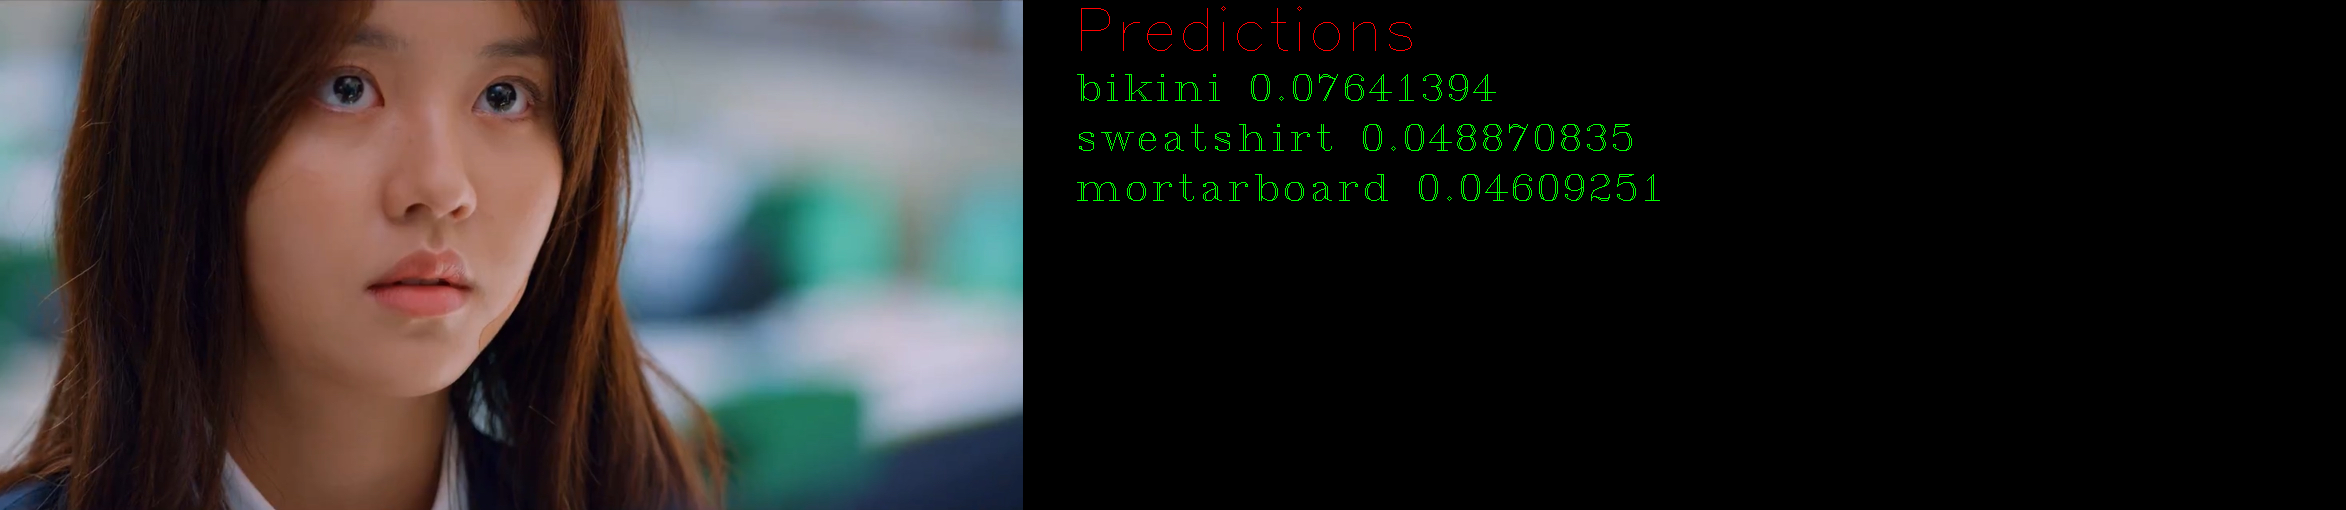

In [ ]:
# here is code to detect my future girlfriend :)

from keras.preprocessing import image

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = resnet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

img2 = cv2.imread(img_path)
imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

name = 'Predictions'
preditions = decode_predictions(preds, top=3)[0] 
input_im = imageL.copy()

BLACK = [0,0,0]
expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[1]+300 ,cv2.BORDER_CONSTANT,value=BLACK)
img_width = input_im.shape[1]
for (i,predition) in enumerate(preditions):
    string = str(predition[1]) + " " + str(predition[2])
    cv2.putText(expanded_image,str(name),(img_width + 50,50),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),1)
    cv2.putText(expanded_image,string,(img_width + 50,50+((i+1)*50)),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,0),1)
cv2_imshow(expanded_image)

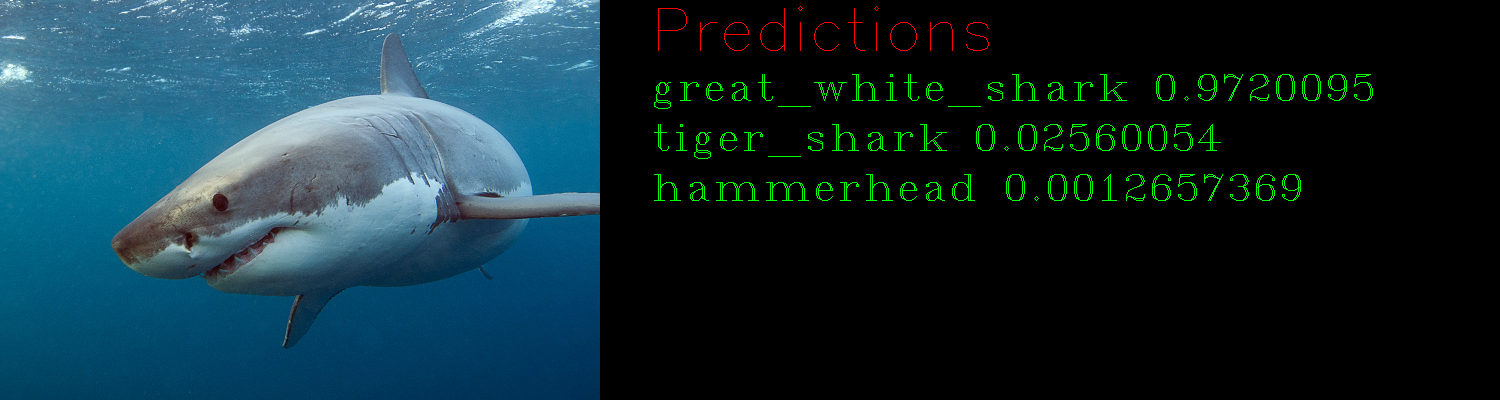

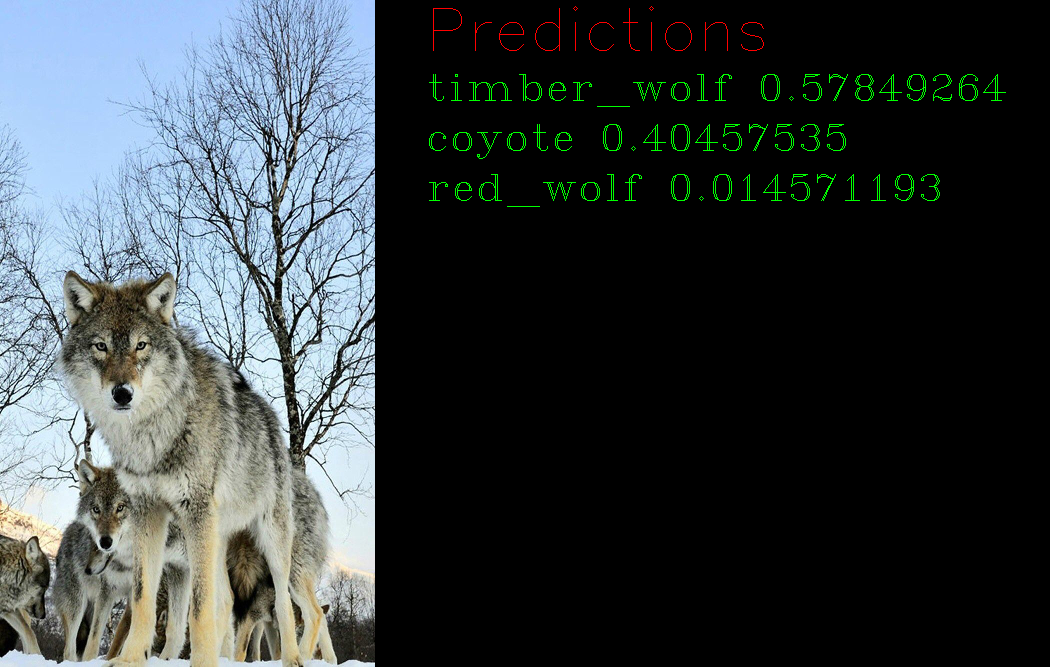

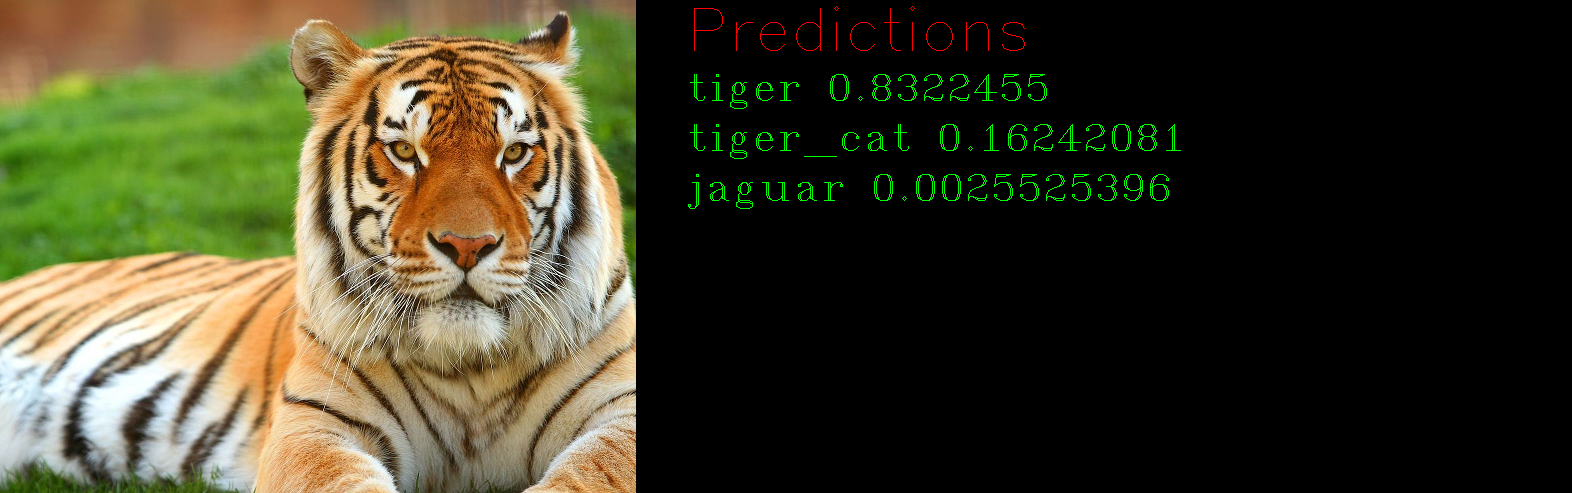

In [ ]:
# Here is code to detect a whole images that located in appropriate folder
# So you can make your own folder with previous tutorial (in above)

import cv2
from os import listdir
from os.path import isfile, join

# Our openCV function that displays the image and it's predicted labels 
def draw_test(name, preditions, input_im):
    """Function displays the output of the prediction alongside the orignal image"""
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[1]+300 ,cv2.BORDER_CONSTANT,value=BLACK)
    img_width = input_im.shape[1]
    for (i,predition) in enumerate(preditions):
        string = str(predition[1]) + " " + str(predition[2])
        cv2.putText(expanded_image,str(name),(img_width + 50,50),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),1)
        cv2.putText(expanded_image,string,(img_width + 50,50+((i+1)*50)),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,0),1)
    cv2_imshow(expanded_image)

# Get images located in ./images folder

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Loop through images run them through our classifer
for file in file_names:

    from keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = resnet_model.predict(x)
    predictions = decode_predictions(preds, top=3)[0]
    draw_test("Predictions", predictions, imageL)

    # print(preds.shape)
    # cv2_imshow(preds)
    cv2.waitKey(0)

cv2.destroyAllWindows()